<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/2023_12_3_301_YOLO_v5m_Mask_2_Classes_Github_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO_v5m Custom Dataset (2 Classes)

* https://github.com/ultralytics/yolov5

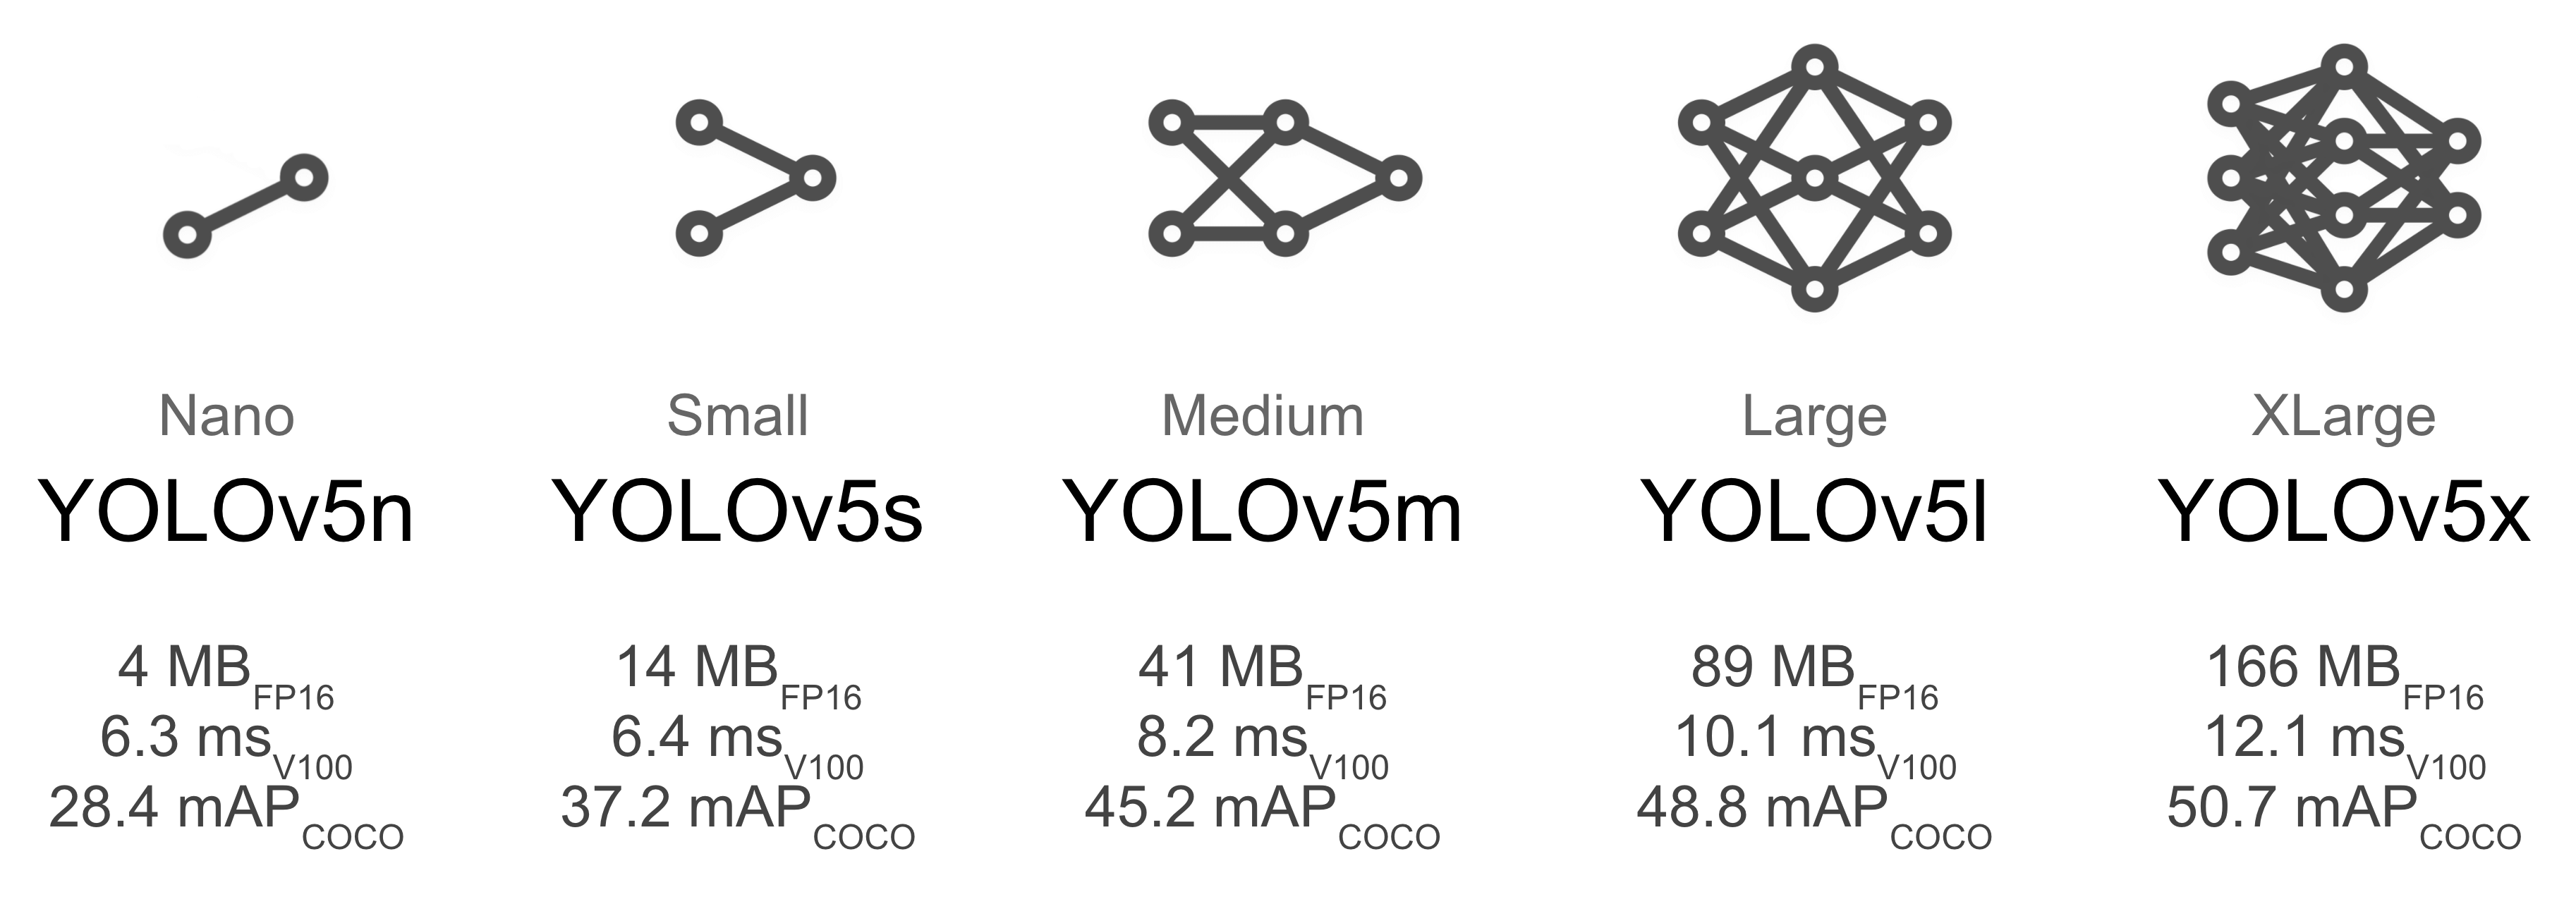

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. Custom Data_Set

* 2 Classes

>## 1) wget From Github

* 'maskdataset_2C.zip' 파일 다운로드

In [ ]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_2C.zip

--2023-11-28 04:26:34--  https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_2C.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19667795 (19M) [application/zip]
Saving to: ‘maskdataset_2C.zip’

maskdataset_2C.zip  100%[===================>]  18.76M  --.-KB/s    in 0.09s   

2023-11-28 04:26:36 (219 MB/s) - ‘maskdataset_2C.zip’ saved [19667795/19667795]



* 현재 작업 경로

In [ ]:
!pwd

/content


* 다운로드 결과 확인

In [ ]:
!ls -l

total 19212
-rw-r--r-- 1 root root 19667795 Nov 28 04:26 maskdataset_2C.zip
drwxr-xr-x 1 root root     4096 Nov 22 14:27 sample_data


>## 2) Unzip

In [ ]:
!unzip -q /content/maskdataset_2C.zip -d /content

# II. Train vs. Test Split

>## 1) Image Files

In [ ]:
from glob import glob
# jpg파일만 모여 있어야함
img_list = glob('/content/dataset/images/*.jpg')

print(len(img_list))

100


>## 2) Label Files

In [ ]:
from glob import glob
# txt파일만 모여 있어야함
txt_list = glob('/content/dataset/images/*.txt')

print(len(txt_list))

100


>## 3) 'labels' 디렉토리 생성

In [ ]:
!mkdir /content/dataset/labels

* 생성 확인

In [ ]:
!ls -ld /content/dataset/labels

drwxr-xr-x 2 root root 4096 Nov 28 04:26 /content/dataset/labels


>## 4) Label Files 이동

* 'images' to 'labels' 디렉토리

In [ ]:
# 디렉토리 만들어서 분류 해줌
for a in txt_list:
  !mv {a} /content/dataset/labels

* 실행 확인

In [ ]:
# 분류 된거 확인
from glob import glob

img_list = glob('/content/dataset/images/*.jpg')
txt_list = glob('/content/dataset/labels/*.txt')

print(len(img_list))
print(len(txt_list))

100
100


>## 5) train_test_split( )

* 8:2

In [ ]:
from sklearn.model_selection import train_test_split

train_img_list, valid_img_list = train_test_split(img_list,
                                                test_size = 0.2,
                                                random_state = 2045)

print(len(train_img_list), len(valid_img_list))

80 20


* 목록 확인

In [ ]:
print('Train_Img: ', train_img_list)
print('Valid_Img: ', valid_img_list)

Train_Img:  ['/content/dataset/images/jordan.jpg', '/content/dataset/images/images293.jpg', '/content/dataset/images/images72.jpg', '/content/dataset/images/merlin_168867003_1a8a1c5a-76af-4542-8585-bd6745eb0922-master1050.jpg', '/content/dataset/images/_111510370_060683565.jpg', '/content/dataset/images/LondonChineseny260120-3.jpg', '/content/dataset/images/images34.jpg', '/content/dataset/images/images102.jpg', '/content/dataset/images/kolkata1.jpg', '/content/dataset/images/merlin_168883104_2f24a73d-d374-4f3e-8395-74b9ee4b865f-master1050.jpg', '/content/dataset/images/img-1580446267-73019900.jpg', '/content/dataset/images/merlin_167592177_faab52d5-95c1-48a0-b533-934d06fbed8d-superJumbo.jpg', '/content/dataset/images/mao-virus-900x540.jpg', '/content/dataset/images/images70.jpg', '/content/dataset/images/maxresdefault3.jpg', '/content/dataset/images/images292.jpg', '/content/dataset/images/maxresdefault4.jpg', '/content/dataset/images/images25.jpg', '/content/dataset/images/merlin_167

>## 6) Train.txt & Valid.txt 생성

In [ ]:
with open('/content/dataset/Train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/dataset/Valid.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

* 생성 확인

In [ ]:
!ls -l /content/dataset/*.txt

-rw-r--r-- 1 root root 4318 Nov 28 04:26 /content/dataset/Train.txt
-rw-r--r-- 1 root root  952 Nov 28 04:26 /content/dataset/Valid.txt


>## 7) data.yaml 생성

In [ ]:
yaml_text = """train: /content/dataset/Train.txt
val: /content/dataset/Valid.txt

nc: 2
names: ['without_mask', 'with_mask']"""

with open('/content/dataset/data.yaml', 'w') as file:
    file.write(yaml_text)

* 생성 확인

In [ ]:
!cat /content/dataset/data.yaml

train: /content/dataset/Train.txt
val: /content/dataset/Valid.txt

nc: 2
names: ['without_mask', 'with_mask']

# III. YOLO_v5 Configuration

>## 1) YOLO_v5 Clone

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16078, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 16078 (delta 6), reused 9 (delta 1), pack-reused 16056
Receiving objects: 100% (16078/16078), 14.72 MiB | 11.80 MiB/s, done.
Resolving deltas: 100% (11038/11038), done.


* 작업 경로 설정

In [ ]:
%cd yolov5

/content/yolov5


>## 2) Install Dependencies

In [ ]:
!pip install -qr requirements.txt

>## 3) Configuration Check

In [ ]:
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.1.0+cu118 (Tesla T4)


# IV. Model Learning

* 현재 작업 경로

In [ ]:
!pwd

/content/yolov5


>## 1) YOLO_v5m

* yolov5m.pt
 - 약 30분

In [ ]:
%%time

!python train.py --img 640 --batch 16 --epochs 200 --weights yolov5m.pt --data /content/dataset/data.yaml --name mask_yolov5_results

2023-11-28 04:27:15.149037: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 04:27:15.149088: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 04:27:15.149129: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, wor

> ## 2) Object Detection 결과 확인

>### (1) Loss & mAP

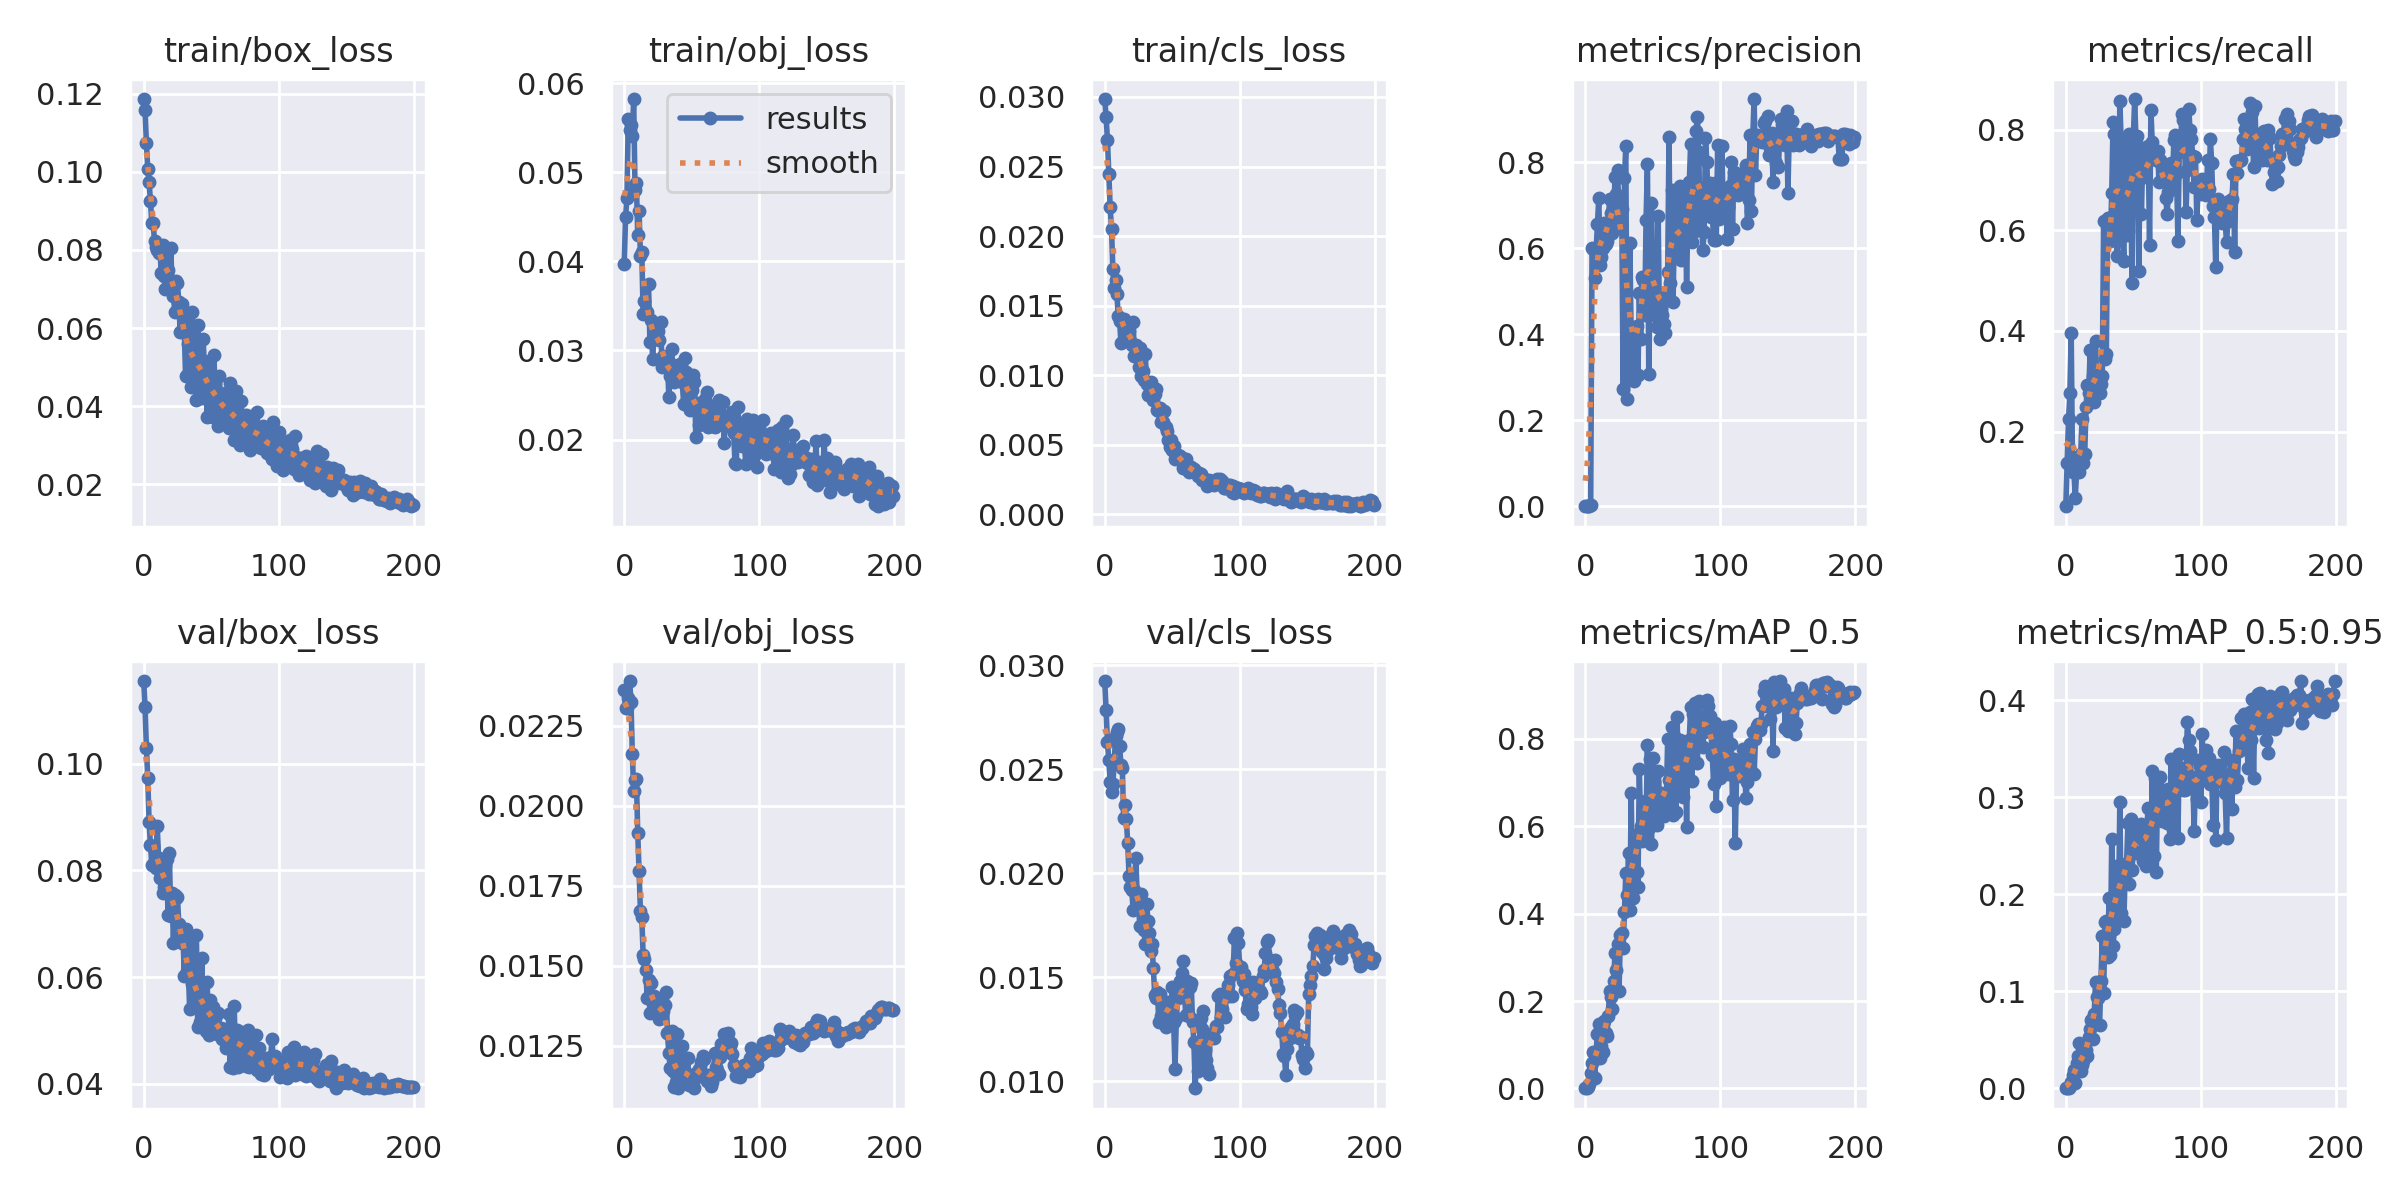

In [ ]:
from IPython.display import Image

Image('/content/yolov5/runs/train/mask_yolov5_results/results.png')

>### (2) Training Results Visualization

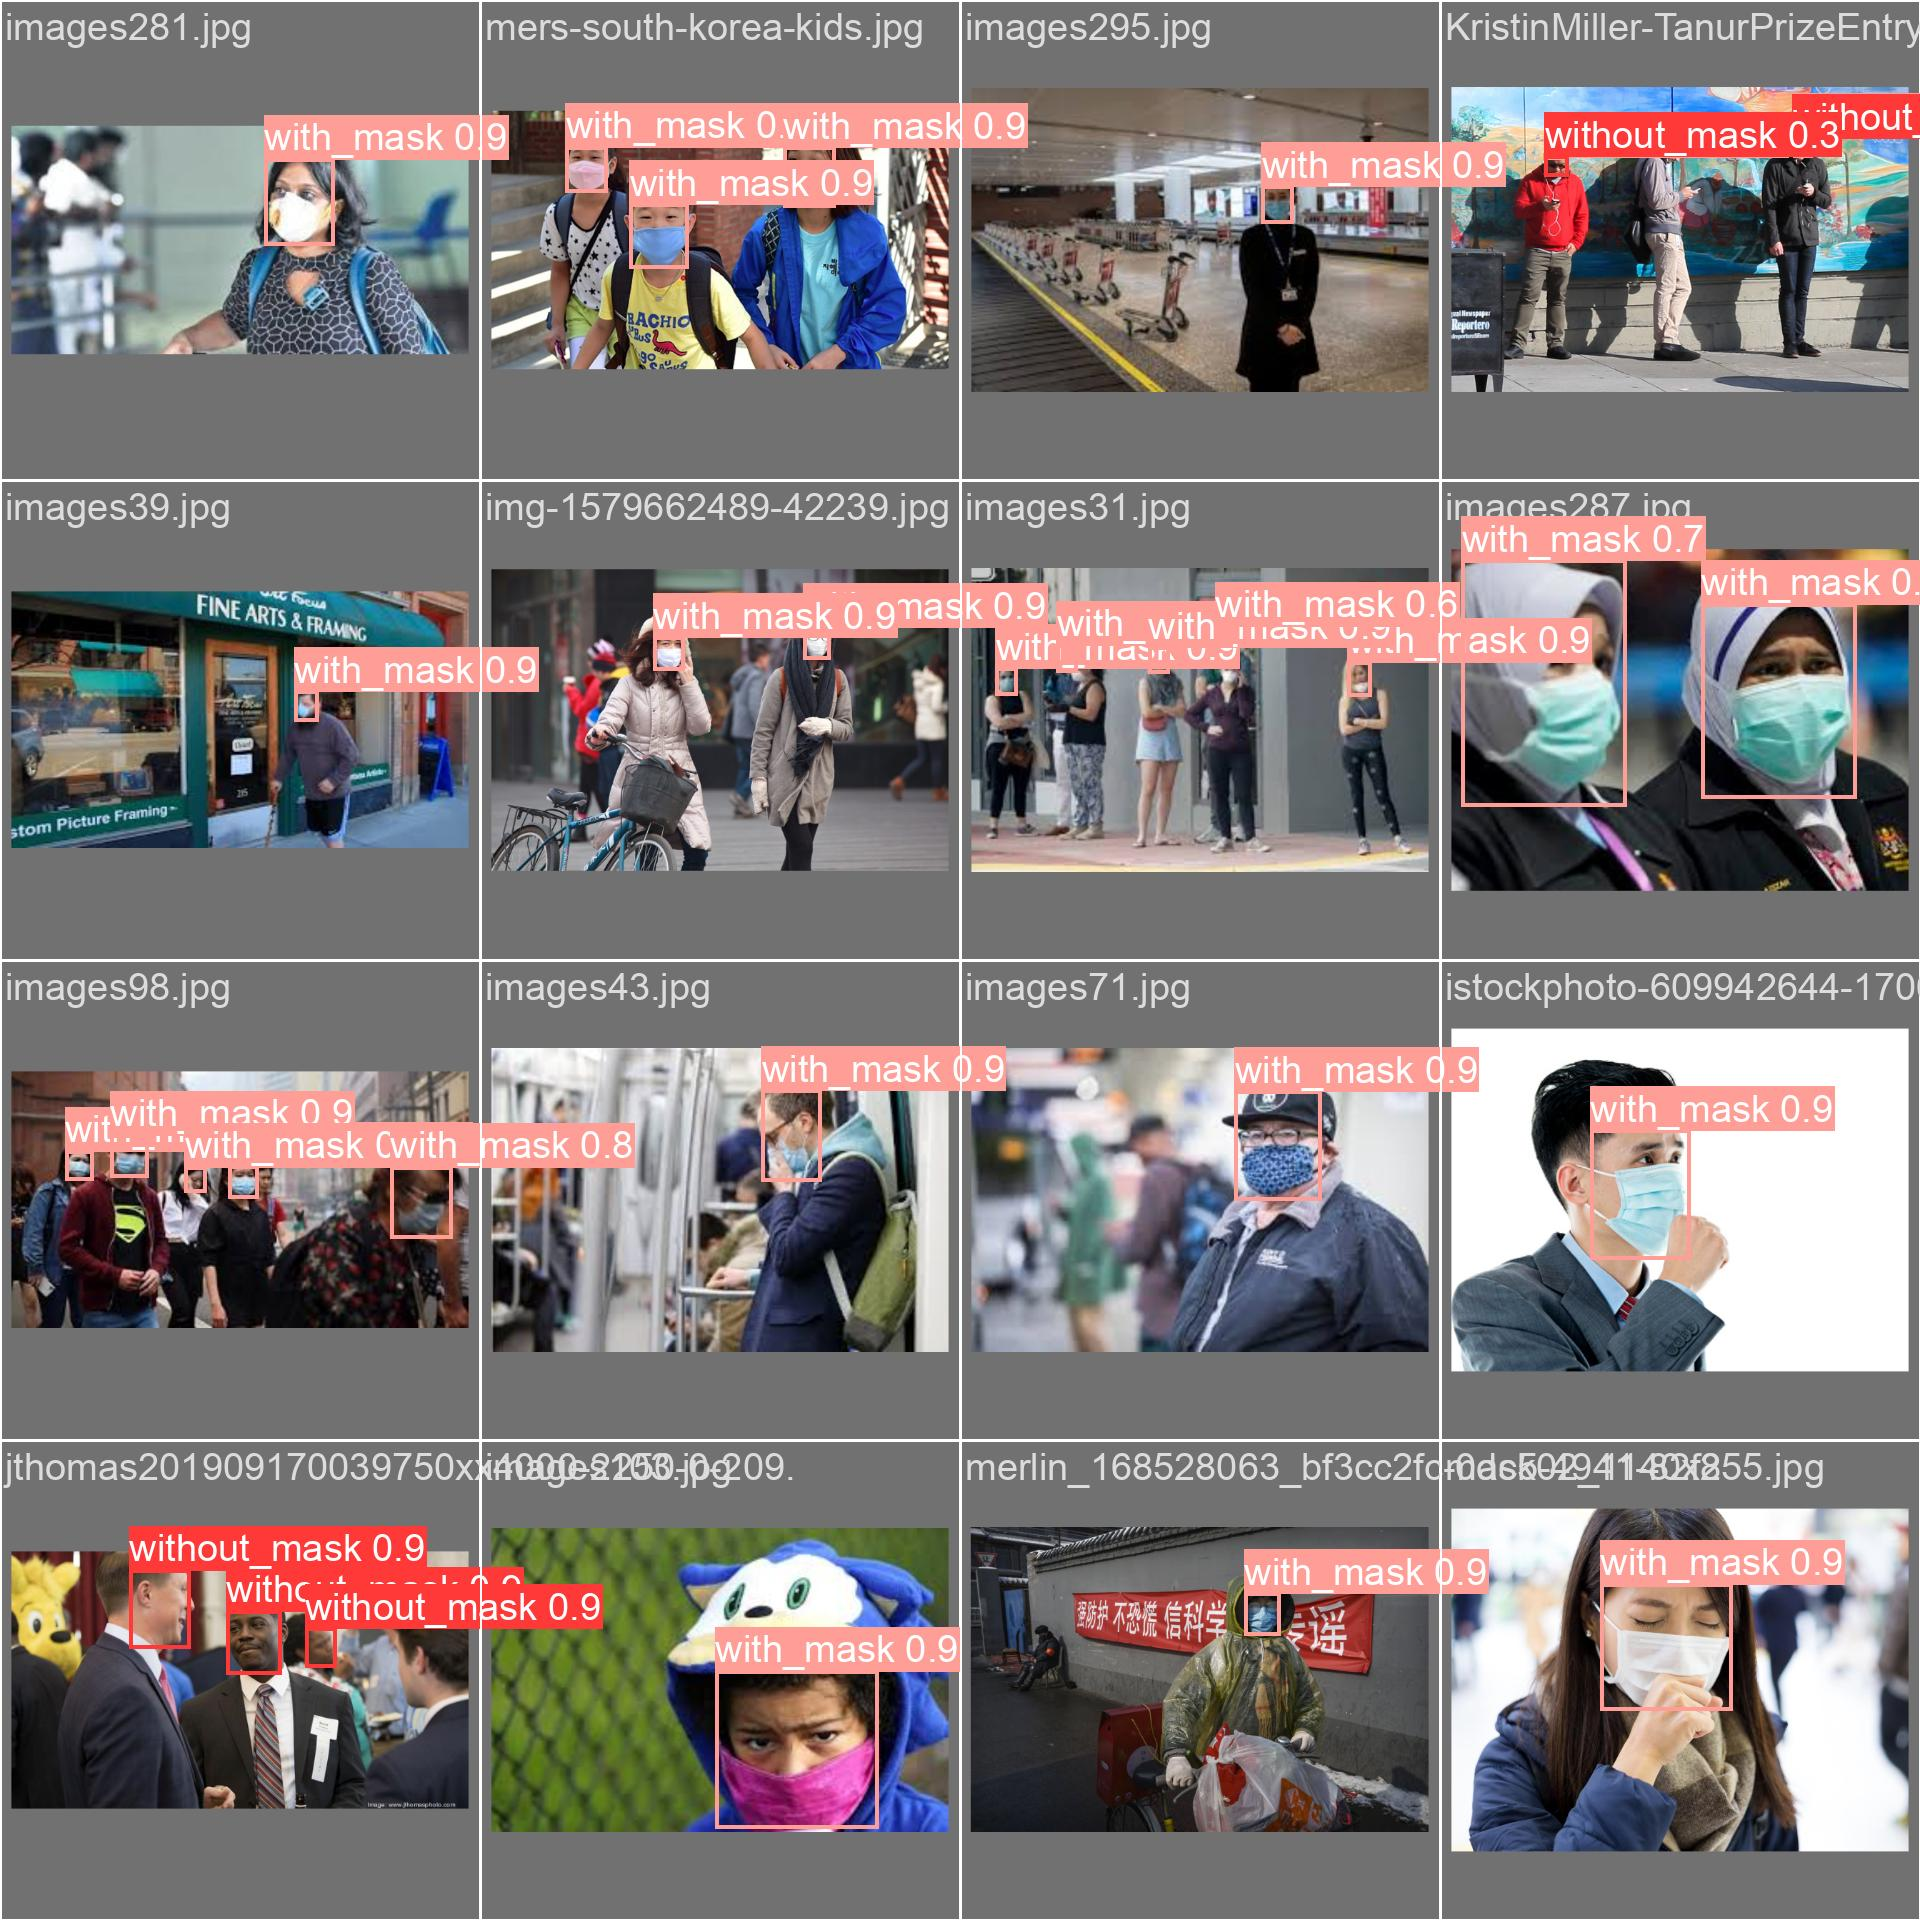

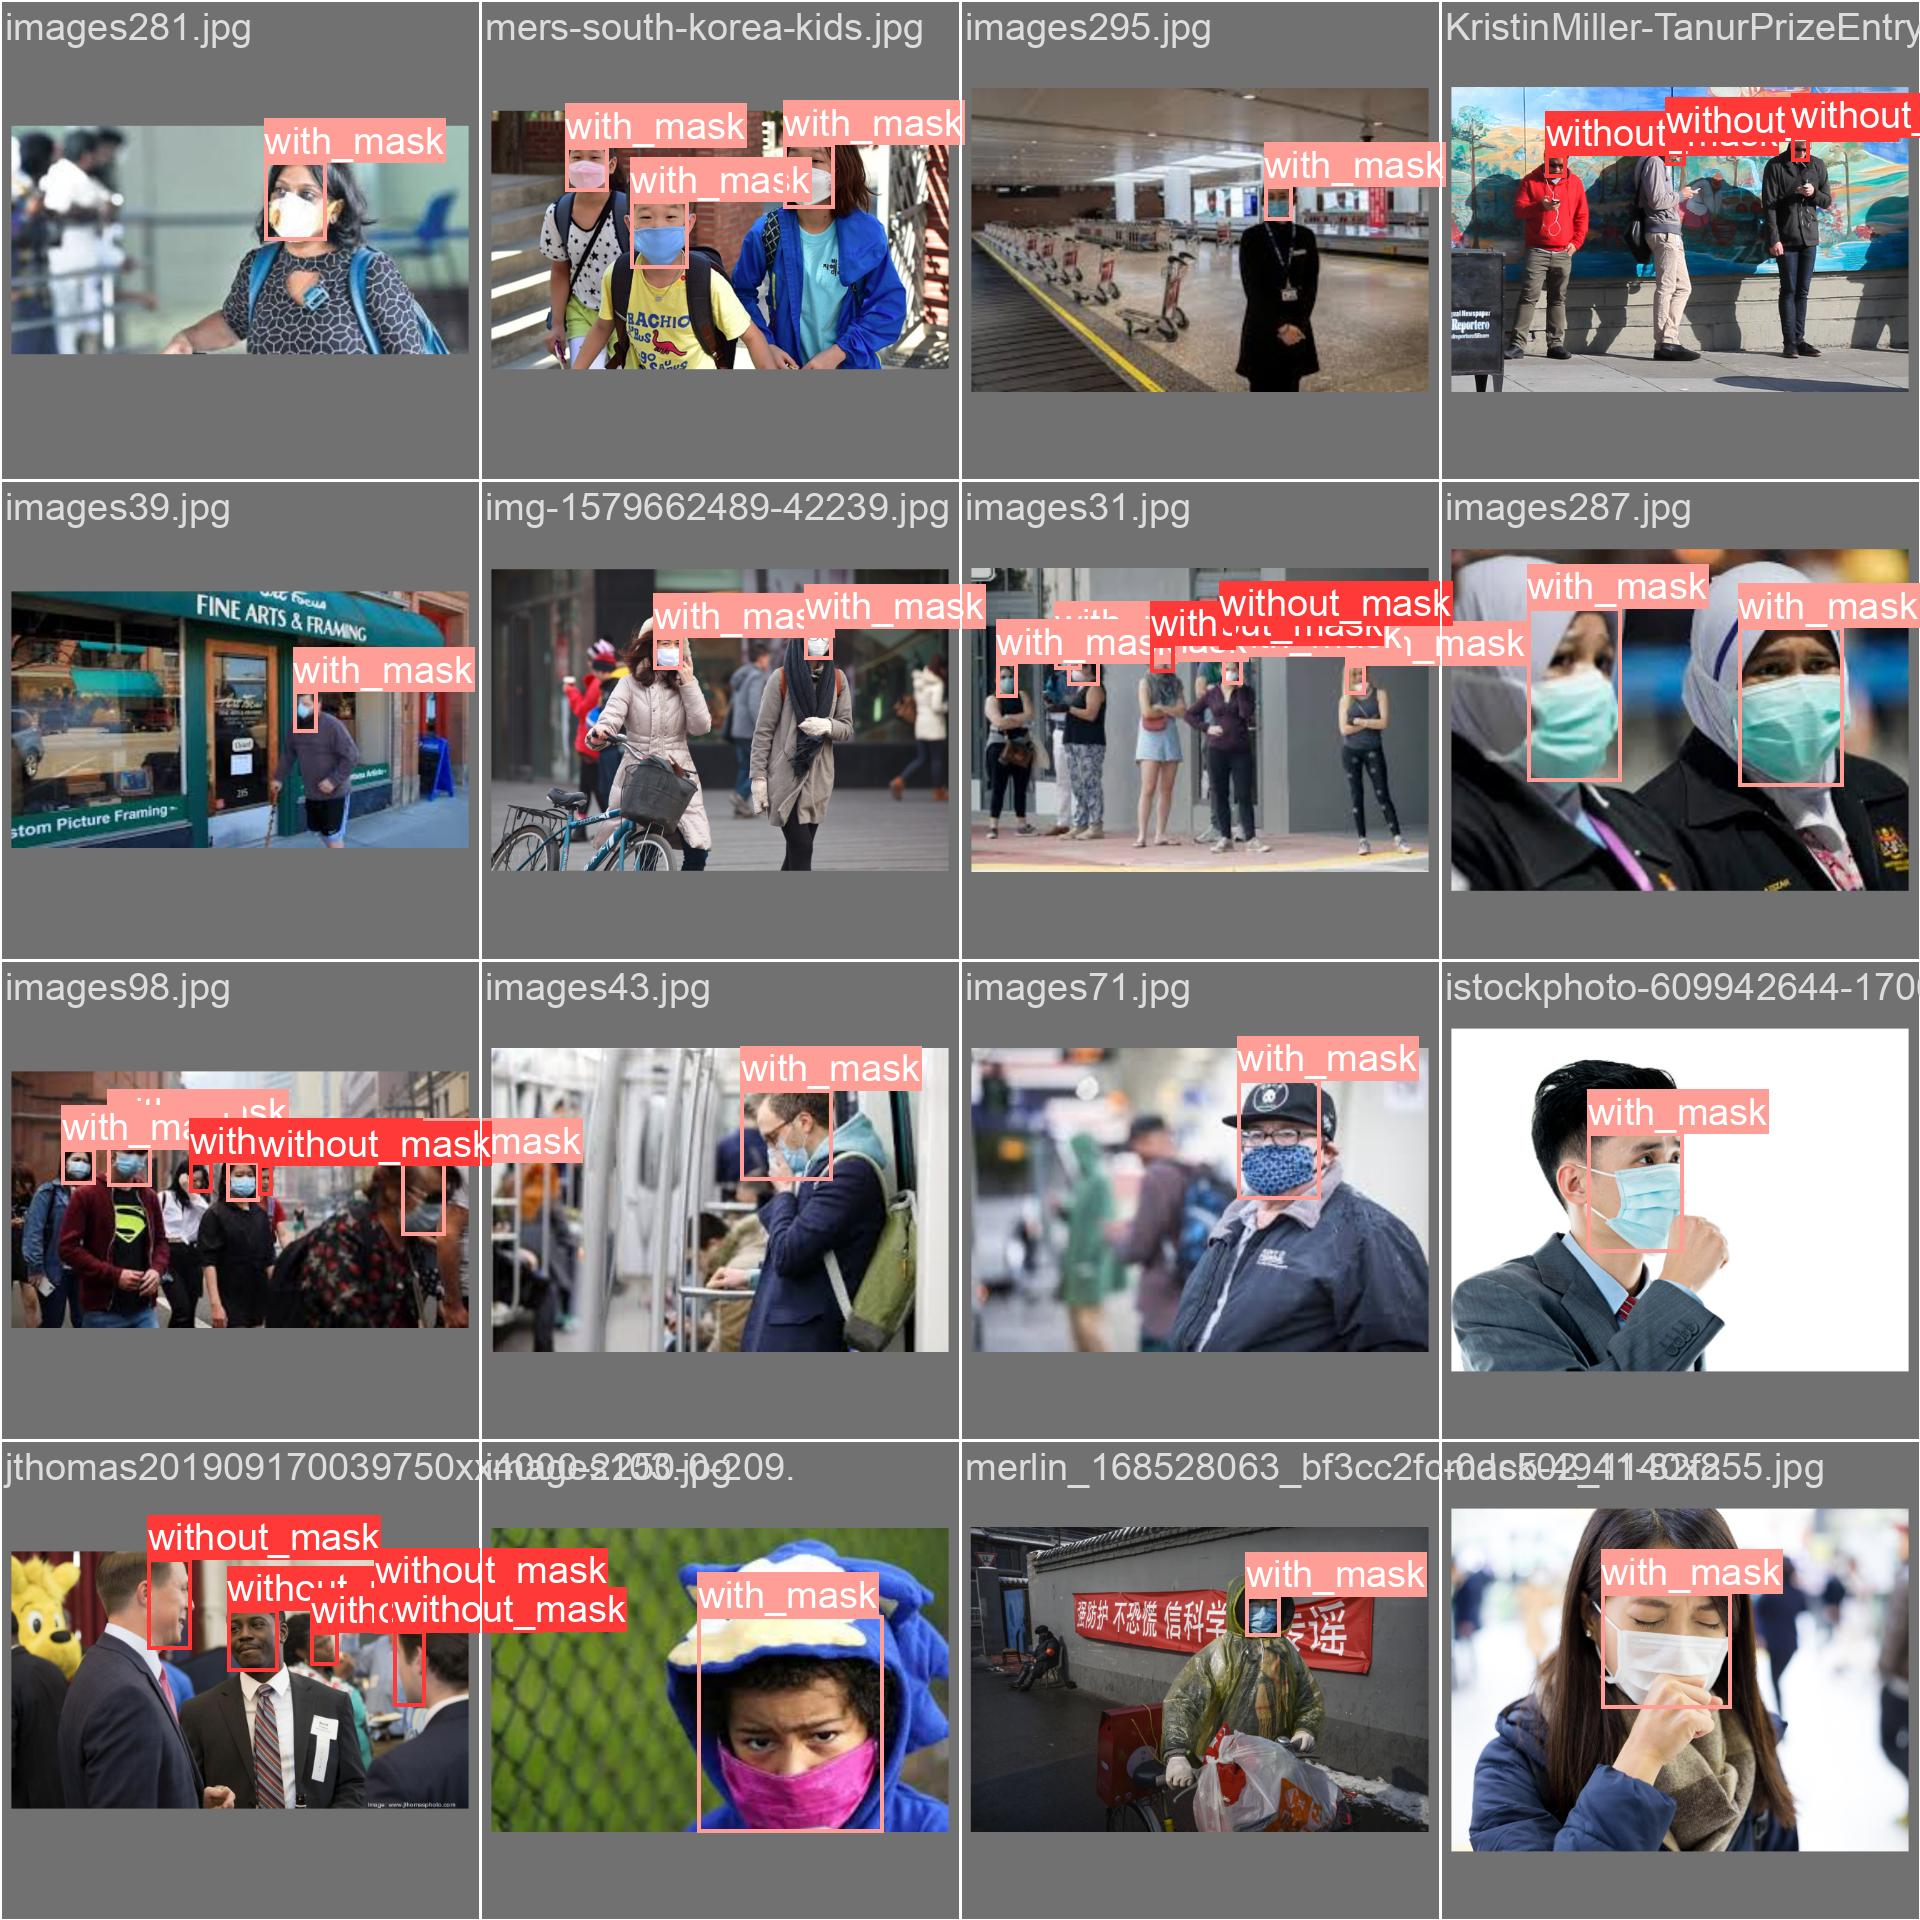

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/train/mask_yolov5_results/v*.jpg'):
    display(Image(filename=imageName))
    print("\n")

# V. Model Validation

* 현재 작업 경로

In [ ]:
!pwd

/content/yolov5


>## 1) Validation 데이터에 best.pt 적용

In [ ]:
!python val.py --data /content/dataset/data.yaml --weights /content/yolov5/runs/train/mask_yolov5_results/weights/best.pt --exist-ok

val: data=/content/dataset/data.yaml, weights=['/content/yolov5/runs/train/mask_yolov5_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=True, half=False, dnn=False
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning /content/dataset/Valid.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.74s/it]
                   all         20         41      0.866      0.782      0.922      0.413
          without_mask         20         12          1      0.634      0.918      0.293
         

# VI. Model Test

>## 1) Test Directory
 * --source /content/dataset/test

In [ ]:
!python detect.py --source /content/dataset/test --weights /content/yolov5/runs/train/mask_yolov5_results/weights/best.pt --conf 0.5 --name Mask_Test --exist-ok --line-thickness 1

detect: weights=['/content/yolov5/runs/train/mask_yolov5_results/weights/best.pt'], source=/content/dataset/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=Mask_Test, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
image 1/5 /content/dataset/test/mask_test_1.jpg: 384x640 4 with_masks, 48.7ms
image 2/5 /content/dataset/test/mask_test_2.jpg: 640x512 1 without_mask, 57.0ms
image 3/5 /content/dataset/test/mask_test_3.jpg: 640x512 2 without_masks, 3 with_masks, 20.2ms
image 4/5 /content/dataset/test/mask_t

>## 2) Results Visualization

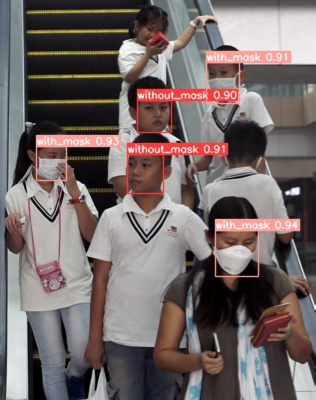

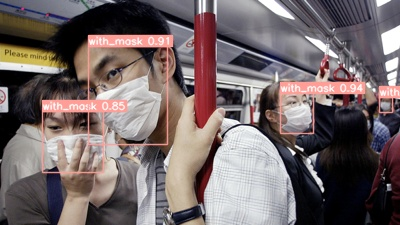

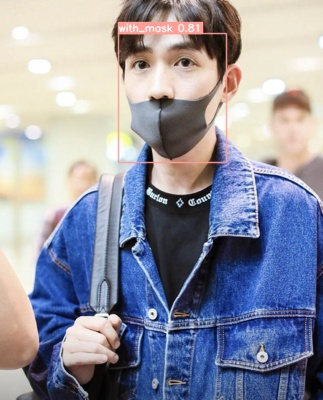

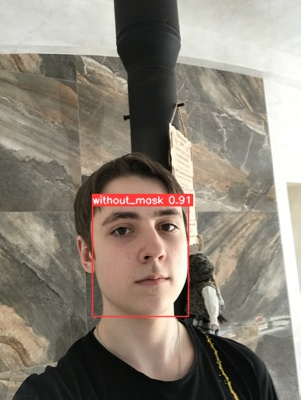

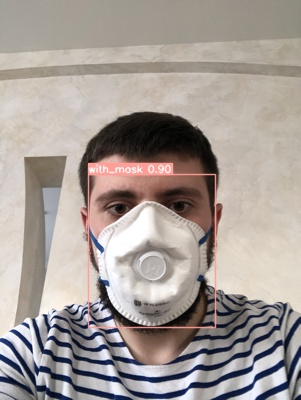

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/Mask_Test/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

# VII. Save Model to Google Drive

>## 1) Mount Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

>## 2) Model Copy to Google Drive

In [ ]:
# cp -r /content/yolov5/runs/train/mask_yolov5_results /content/drive/MyDrive/Mask_yolov5

#
#
#
# The End
#
#
#